# ***9. This exercise involves the Auto data set studied in the lab. Make sure that the missing values have been removed from the data.***

In [2]:
# Lib
import pandas as pd
import numpy as np
import seaborn as sns


In [3]:
# Load data
Auto_data = pd.read_csv("Auto.csv")
Auto_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


# ***Are there any missing values? - Anwser: Yes (Missing value in horsepower column)***

In [4]:
# Make sure that the missing values have been removed from the data
not_object_check = [temp for temp in Auto_data.columns if Auto_data.dtypes[temp] != 'object']
Auto_data = Auto_data[Auto_data["horsepower"]!="?"]
Auto_data["horsepower"] = Auto_data["horsepower"].astype('int64')
Auto_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


# ***(a) Which of the predictors are quantitative, and which are qualitative?- Answer: Name is quanlitative, and the rest are quantitative.***

In [5]:
# Check quantitative predictors and qualitative predictors
quantitative = [temp for temp in Auto_data.columns if Auto_data.dtypes[temp] != 'object']
qualitative = [temp for temp in Auto_data.columns if Auto_data.dtypes[temp] == 'object']
print("- The quantitative predictors: ", quantitative)
print("- The qualitative predictors: ",qualitative)

# Because origin column just contain 3 values: 1, 2, 3 => it should be a qualitative predictor => converted into Country_1, Country_2, Country_3
print("- 3 values of the origin column: ", Auto_data["origin"].unique())
Auto_data['origin'].replace(to_replace=[1, 2, 3], value=["Country_1", "Country_2", "Country_3"], inplace=True)
print("- Auto_data: ")
print(Auto_data)

- The quantitative predictors:  ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
- The qualitative predictors:  ['name']
- 3 values of the origin column:  [1 3 2]
- Auto_data: 
      mpg  cylinders  displacement  ...  year     origin                       name
0    18.0          8         307.0  ...    70  Country_1  chevrolet chevelle malibu
1    15.0          8         350.0  ...    70  Country_1          buick skylark 320
2    18.0          8         318.0  ...    70  Country_1         plymouth satellite
3    16.0          8         304.0  ...    70  Country_1              amc rebel sst
4    17.0          8         302.0  ...    70  Country_1                ford torino
..    ...        ...           ...  ...   ...        ...                        ...
392  27.0          4         140.0  ...    82  Country_1            ford mustang gl
393  44.0          4          97.0  ...    82  Country_2                  vw pickup
394  32.0          4 

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


# ***(b) What is the range of each quantitative predictor?***

In [6]:
mqg_range = [Auto_data["mpg"].min(), Auto_data["mpg"].max()]
cylinders_range = [Auto_data["cylinders"].min(), Auto_data["cylinders"].max()]
displacement_range = [Auto_data["displacement"].min(), Auto_data["displacement"].max()]
horsepower_range = [Auto_data["horsepower"].min(), Auto_data["horsepower"].max()]
weight_range = [Auto_data["weight"].min(), Auto_data["weight"].max()]
acceleration_range = [Auto_data["acceleration"].min(), Auto_data["acceleration"].max()]
year_range = [Auto_data["year"].min(), Auto_data["year"].max()]
print("- The range of mqg: ", mqg_range)
print("- The range of cylinders: ",cylinders_range)
print("- The range of displacement: ",displacement_range)
print("- The range of horsepower: ",horsepower_range)
print("- The range of weight: ",weight_range)
print("- The range of acceleration: ",acceleration_range)
print("- The range of year: ",year_range)

- The range of mqg:  [9.0, 46.6]
- The range of cylinders:  [3, 8]
- The range of displacement:  [68.0, 455.0]
- The range of horsepower:  [46, 230]
- The range of weight:  [1613, 5140]
- The range of acceleration:  [8.0, 24.8]
- The range of year:  [70, 82]


# ***(c) What is the mean and standard deviation of each quantitative predictor?***

In [7]:
Each_Auto_data_mean = Auto_data.mean()
Each_Auto_data_std = Auto_data.std()
print("- Mean of each quantitative predictor: ")
print(Each_Auto_data_mean)
print()
print("- STD of each quantitative predictor: ")
print(Each_Auto_data_std)

- Mean of each quantitative predictor: 
mpg               23.445918
cylinders          5.471939
displacement     194.411990
horsepower       104.469388
weight          2977.584184
acceleration      15.541327
year              75.979592
dtype: float64

- STD of each quantitative predictor: 
mpg               7.805007
cylinders         1.705783
displacement    104.644004
horsepower       38.491160
weight          849.402560
acceleration      2.758864
year              3.683737
dtype: float64


# ***(d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?***

In [8]:
Auto_data["Index"] = [f for f in range(0, 392)]
df_1 = Auto_data[Auto_data["Index"]<10]
df_2 = Auto_data[Auto_data["Index"]>85]
Removed_Auto_data = df_1.append(df_2)
del Auto_data["Index"]  
del Removed_Auto_data["Index"]
Removed_Auto_data.describe()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,mpg,cylinders,displacement,horsepower,weight,acceleration,year
count,316.000000,316.000000,316.000000,316.000000,316.00000,316.000000,316.000000
mean,24.407595,5.373418,187.512658,100.848101,2936.53481,15.717405,77.136076
std,7.863285,1.654179,100.114616,35.954147,811.87445,2.713876,3.123464
min,11.000000,3.000000,68.000000,46.000000,1649.00000,8.500000,70.000000
25%,18.000000,4.000000,100.250000,75.000000,2213.75000,14.000000,75.000000
50%,23.950000,4.000000,145.500000,90.000000,2792.50000,15.500000,77.000000
75%,30.550000,6.000000,250.000000,115.000000,3508.00000,17.300000,80.000000
max,46.600000,8.000000,455.000000,230.000000,4997.00000,24.800000,82.000000


# ***(e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.***

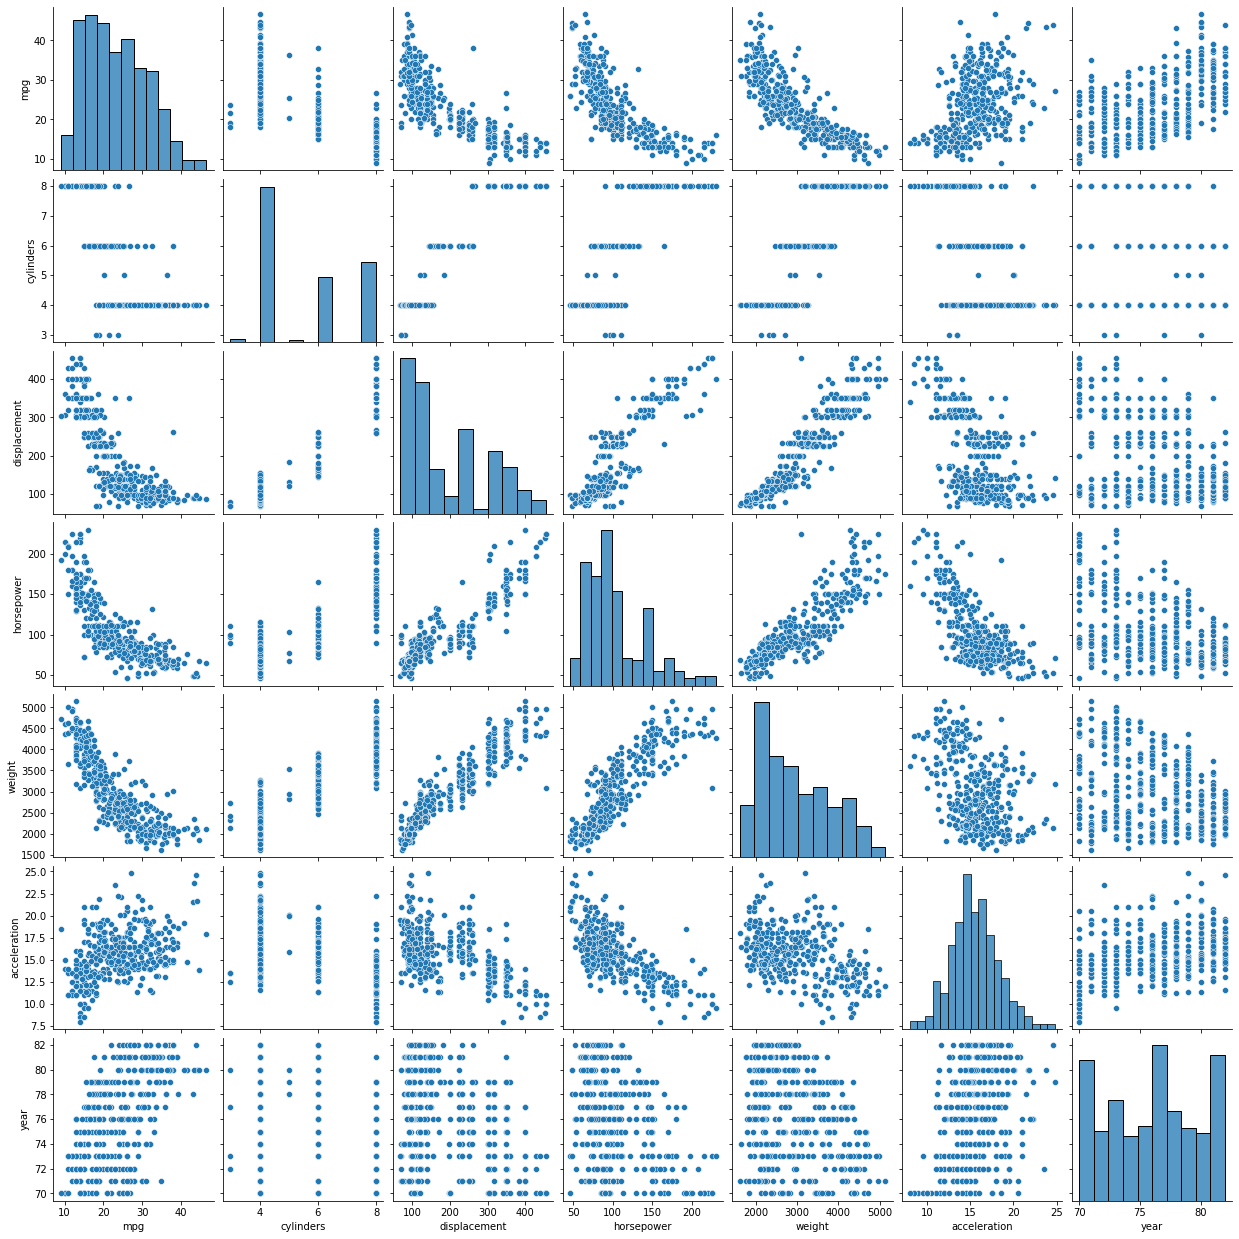

In [9]:
sns.pairplot(Auto_data)

# ***(f) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.- Anwer: Yes. Year, acceleration, and origin would be decent predictors of mpg.***

origin                 Country_1    Country_2    Country_3
mpg          mean      20.033469    27.602941    30.450633
             std        6.440384     6.580182     6.090048
             min        9.000000    16.200000    18.000000
             median    18.500000    26.000000    31.600000
             max       39.000000    44.300000    46.600000
cylinders    mean       6.277551     4.161765     4.101266
             std        1.655996     0.506975     0.590414
             min        4.000000     4.000000     3.000000
             median     6.000000     4.000000     4.000000
             max        8.000000     6.000000     6.000000
displacement mean     247.512245   109.632353   102.708861
             std       98.376347    22.693220    23.140126
             min       85.000000    68.000000    70.000000
             median   250.000000   105.000000    97.000000
             max      455.000000   183.000000   168.000000
horsepower   mean     119.048980    80.558824    79.835443
             std       39.897790    20.157871    17.819199
             min       52.000000    46.000000    52.000000
             median   105.000000    76.500000    75.000000
             max      230.000000   133.000000   132.000000
weight       mean    3372.489796  2433.470588  2221.227848
             std      795.346690   491.813867   320.497248
             min     1800.000000  1825.000000  1613.000000
             median  3381.000000  2240.000000  2155.000000
             max     5140.000000  3820.000000  2930.000000
acceleration mean      14.990204    16.794118    16.172152
             std        2.736020     3.087813     1.954937
             min        8.000000    12.200000    11.400000
             median    15.000000    15.600000    16.400000
             max       22.200000    24.800000    21.000000

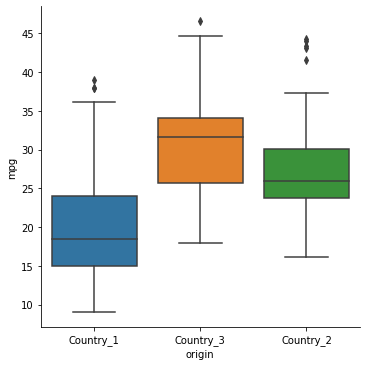

In [15]:
origin_Rel = sns.catplot(x = "origin", y = "mpg", data = Auto_data, kind = "box")

acceleration_Rel = Auto_data.loc[:, "mpg":"acceleration"].groupby(Auto_data["origin"]).agg(["mean", "std", "min", "median", "max"]).T
acceleration_Rel